In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
your_path = "/content/drive/MyDrive/Colab Notebooks/SAI 문제풀이/archive/pokemon.csv"
hdata = pd.read_csv(your_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hdata.sort_values(by='Name', inplace=True)
hdata.reset_index(inplace=True)
hdata.head()

index             Name    Type1  Type2
0    459        abomasnow    Grass    Ice
1     62             abra  Psychic    NaN
2    358            absol     Dark    NaN
3    616         accelgor      Bug    NaN
4    680  aegislash-blade    Steel  Ghost

In [ ]:
import numpy as np
from PIL import Image

pokemon_img = np.empty((0, 120, 120, 3), int)
pokemon_index = np.empty((0), int)

your_img_path = '/content/drive/MyDrive/Colab Notebooks/SAI 문제풀이/archive/images/images/'
path = your_img_path

for num in range(len(hdata)):
  img_name = hdata['Name'][num]

  try:
    im = Image.open(path + '%s.jpg'%(img_name))
    pix = np.array(im)

    if(pix.shape != (120, 120, 3)):
      continue
    pokemon_img = np.append(pokemon_img, np.array([pix]), axis=0)
    pokemon_index = np.append(pokemon_index, num)

  except:
    im = Image.open(path + '%s.png'%(img_name))
    pix = np.array(im)

    if(pix.shape != (120, 120, 4)):
      continue

    for row_index in range(pix.shape[0]):
      for col_index in range(pix.shape[1]):
        if pix[:, :, 3][row_index][col_index] == 0:    # png 데이터의 투명도를 나타내는 부분에서, 포켓몬 이미지를 제외한 배경의 pixel 값을 255로 바꿀 것임
          for i in range(3):
            pix[:, :, i][row_index][col_index] = 255

    pix = pix[:, :, :3] # 투명 부분 버리기
    pokemon_img = np.append(pokemon_img, np.array([pix]), axis=0)
    pokemon_index = np.append(pokemon_index, num)

pokemon_type = hdata.iloc[pokemon_index, 2]

In [ ]:
# 타겟 라벨링
label = pokemon_type.unique()
label = np.sort(label)
print(label)

pokemon_target = np.empty((0), int)

for target in pokemon_type:
  pokemon_target = np.append(pokemon_target, np.where(label == target)[0][0])

['Bug' 'Dark' 'Dragon' 'Electric' 'Fairy' 'Fighting' 'Fire' 'Flying'
 'Ghost' 'Grass' 'Ground' 'Ice' 'Normal' 'Poison' 'Psychic' 'Rock' 'Steel'
 'Water']


In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(pokemon_img, pokemon_target, random_state=42)

train_scaled = train_input / 255.0
test_scaled = test_input / 255.0

In [ ]:
from tensorflow import keras

model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(120, 120, 3)))
model.add(keras.layers.Dense(1000, activation='relu'))
model.add(keras.layers.Dense(18, activation='softmax'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 43200)             0         
                                                                 
 dense_12 (Dense)            (None, 1000)              43201000  
                                                                 
 dense_13 (Dense)            (None, 18)                18018     
                                                                 
Total params: 43,219,018
Trainable params: 43,219,018
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
15/15 [==============================] - 8s 509ms/step - loss: 340.7352 - accuracy: 0.0985
Epoch 2/5
15/15 [==============================] - 8s 510ms/step - loss: 115.4560 - accuracy: 0.1138
Epoch 3/5
15/15 [==============================] - 8s 511ms/step - loss: 74.0097 - accuracy: 0.0941
Epoch 4/5
15/15 [==============================] - 8s 564ms/step - loss: 56.5064 - accuracy: 0.0832
Epoch 5/5
15/15 [==============================] - 9s 628ms/step - loss: 40.8522 - accuracy: 0.0810


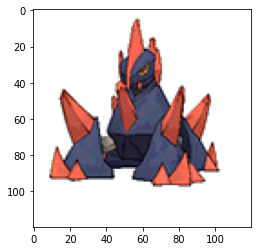

[[1.3316274e-26 1.4754232e-18 3.2060120e-07 8.7216484e-10 9.7427826e-16
  5.7930023e-19 1.1586038e-02 9.5579689e-27 6.6545832e-22 1.6124621e-11
  3.2117180e-06 4.2132546e-09 5.5265537e-07 1.2276748e-11 8.8700023e-21
  9.8840988e-01 1.7474178e-31 8.1834122e-20]]


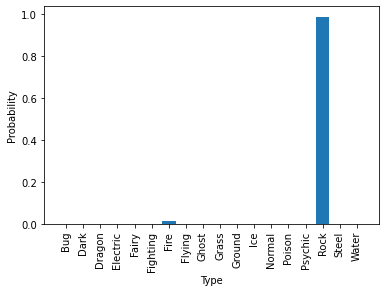

In [ ]:
i = 145

plt.imshow(test_scaled[i].reshape(120,120,3))
plt.show()

preds = model.predict(test_scaled[i:i+1])
print(preds)

plt.bar(label, preds[0])
plt.xlabel('Type')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.show()

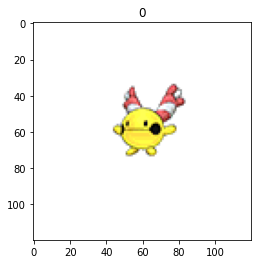

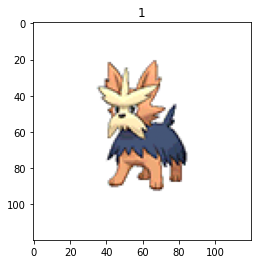

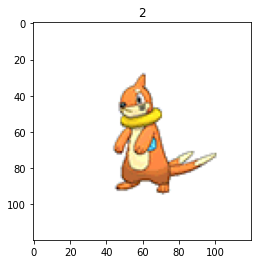

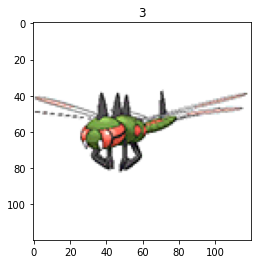

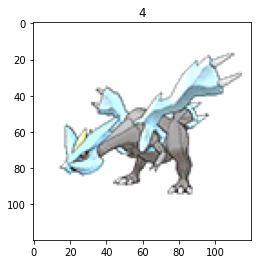

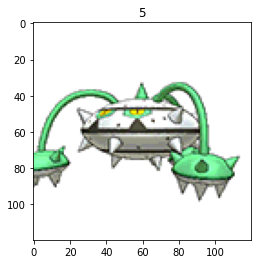

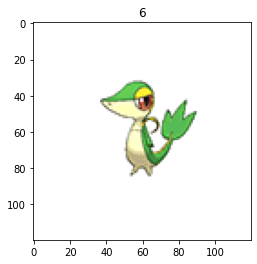

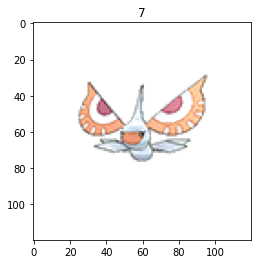

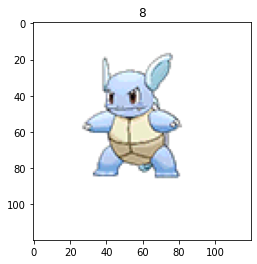

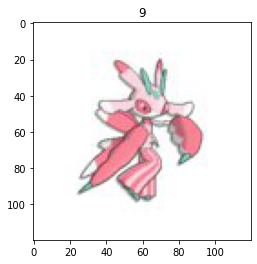

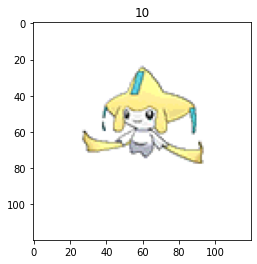

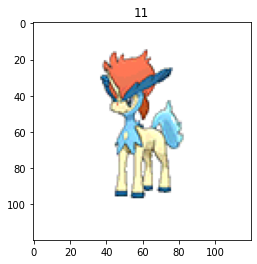

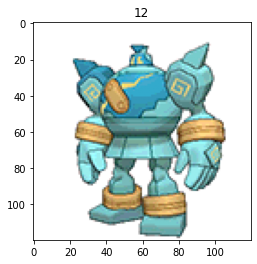

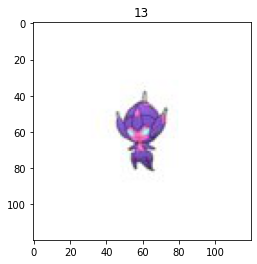

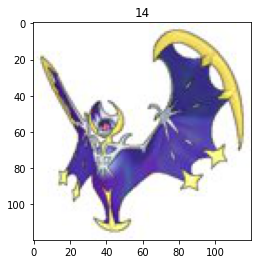

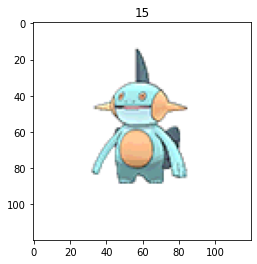

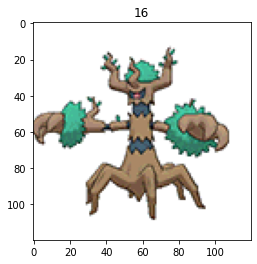

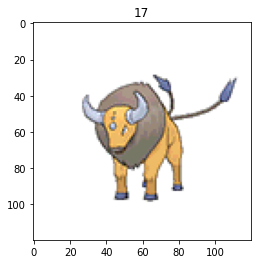

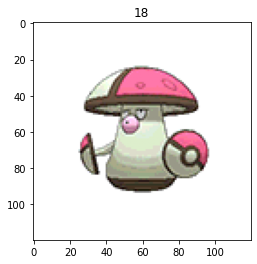

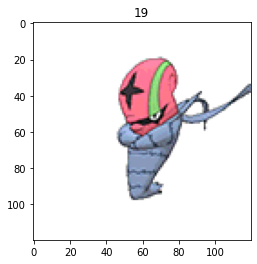

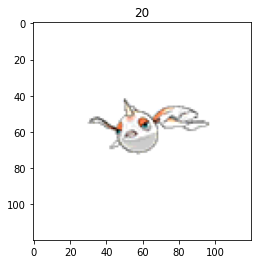

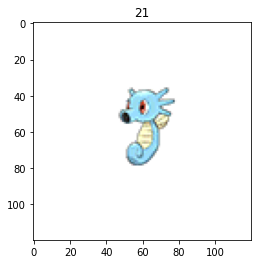

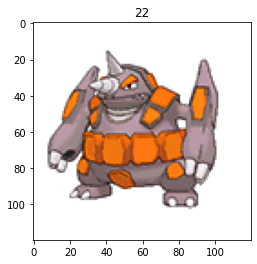

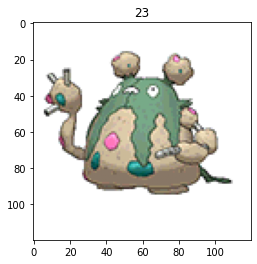

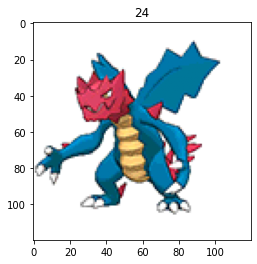

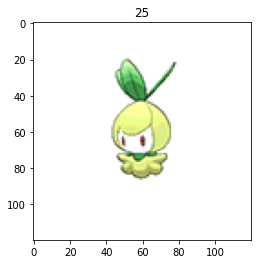

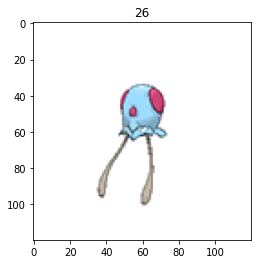

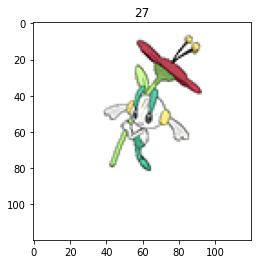

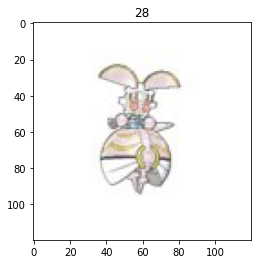

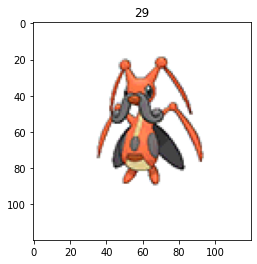

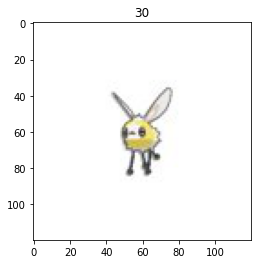

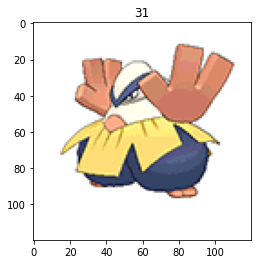

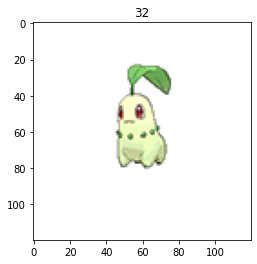

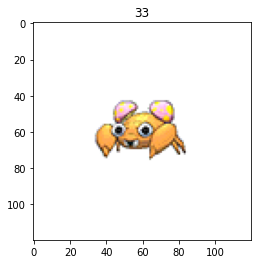

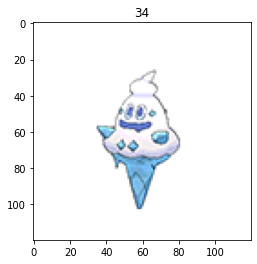

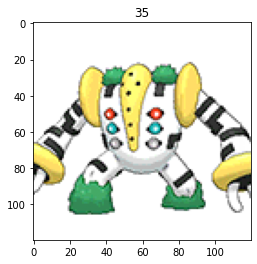

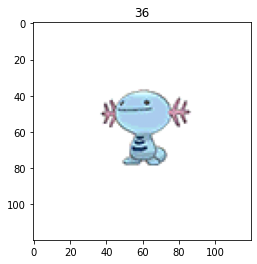

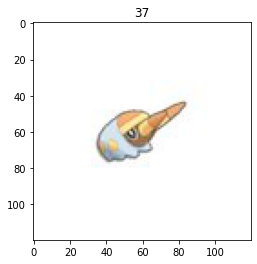

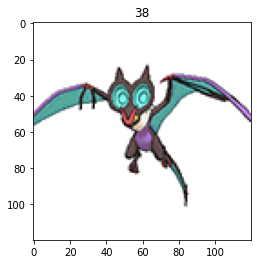

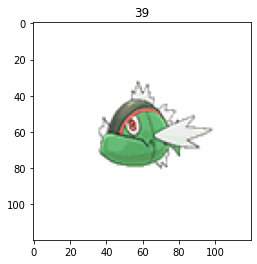

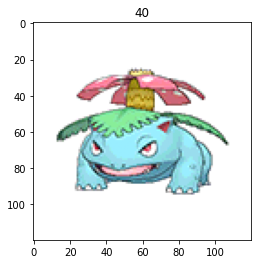

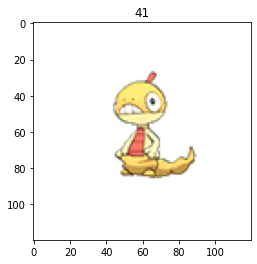

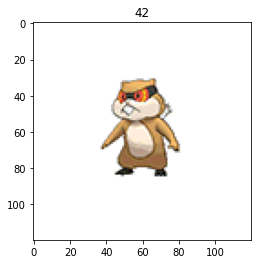

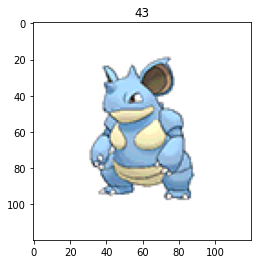

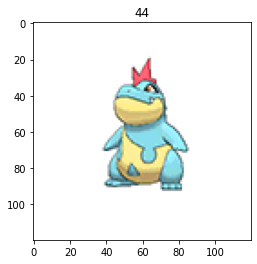

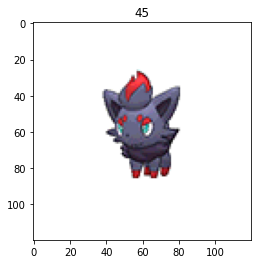

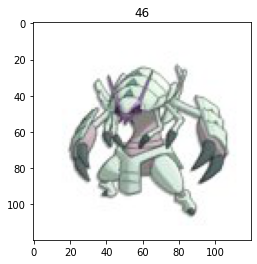

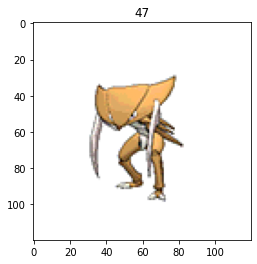

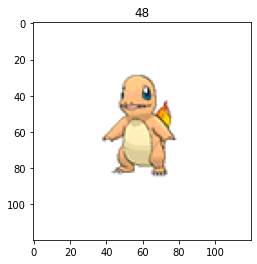

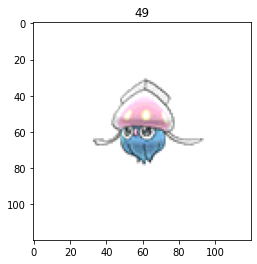

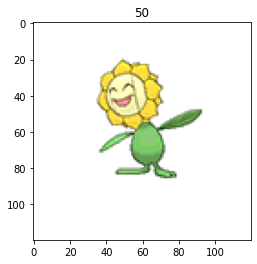

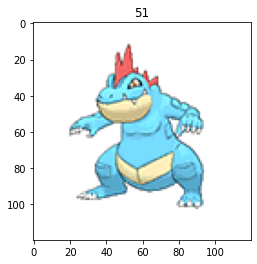

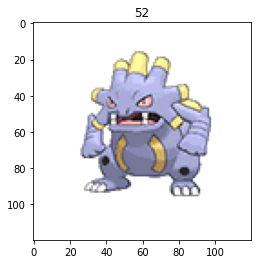

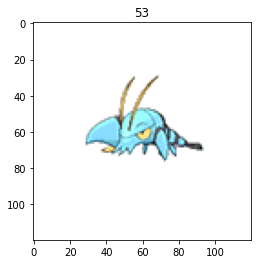

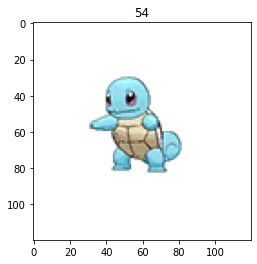

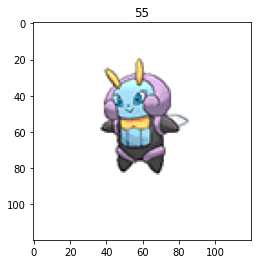

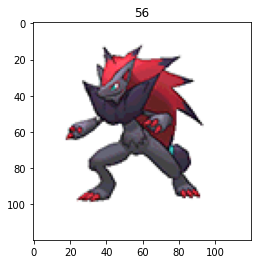

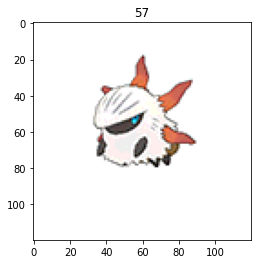

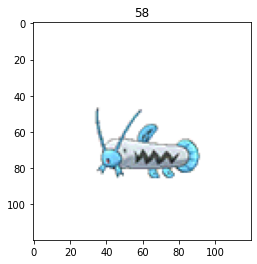

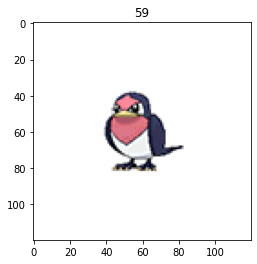

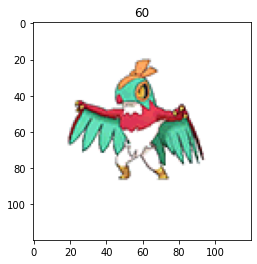

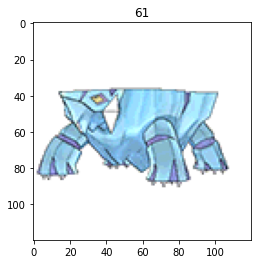

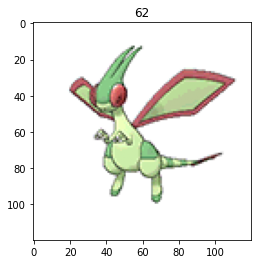

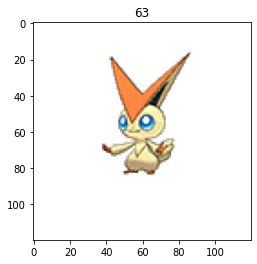

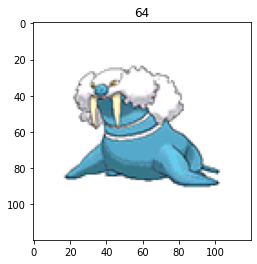

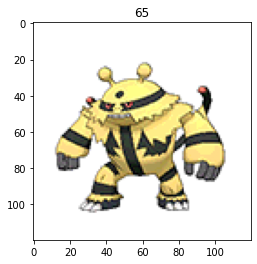

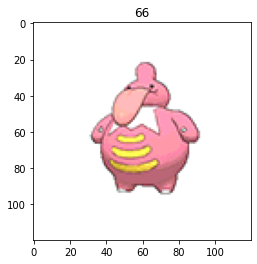

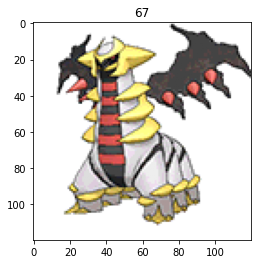

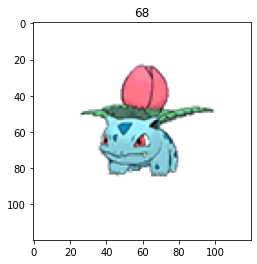

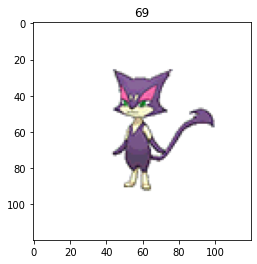

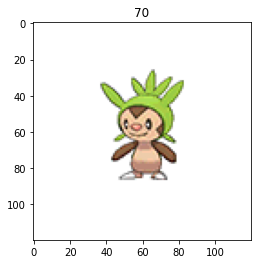

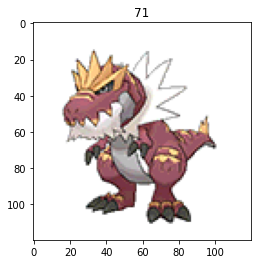

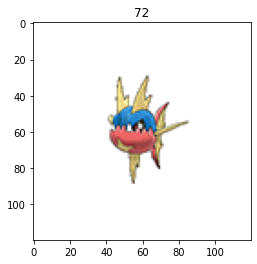

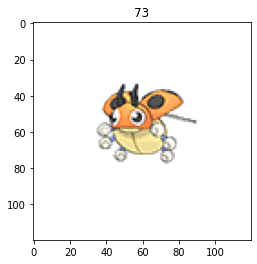

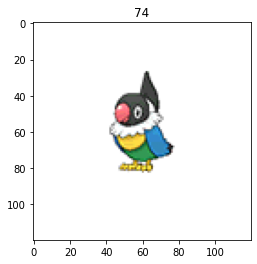

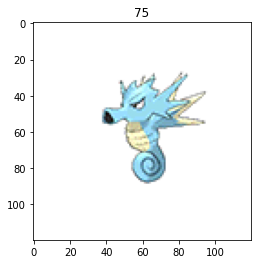

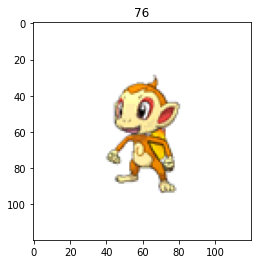

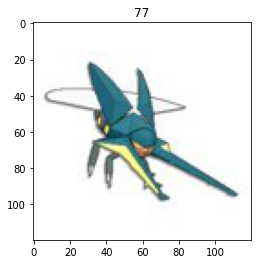

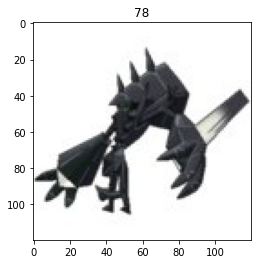

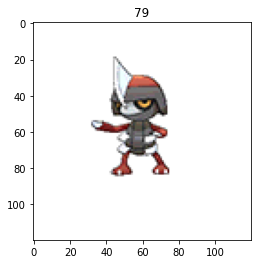

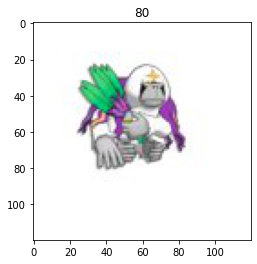

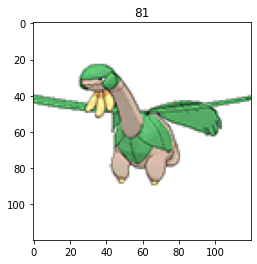

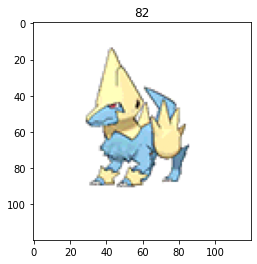

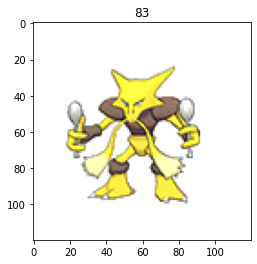

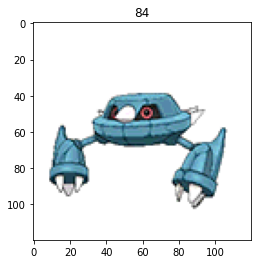

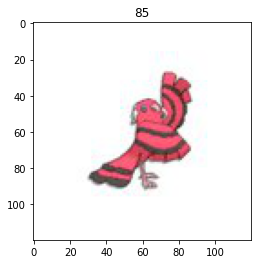

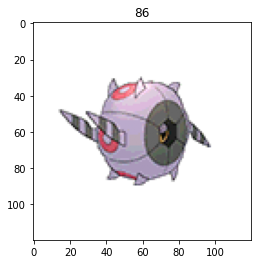

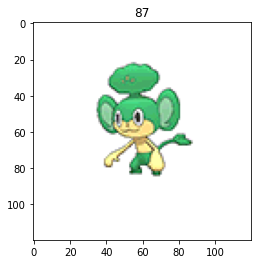

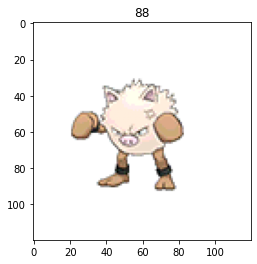

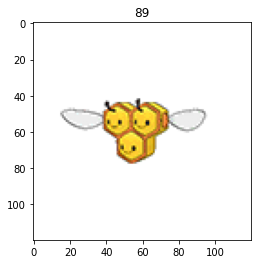

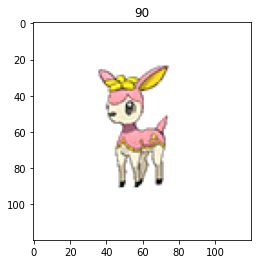

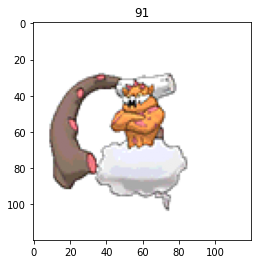

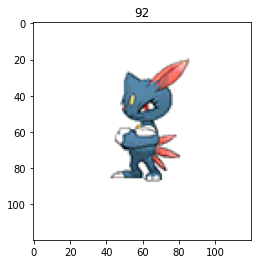

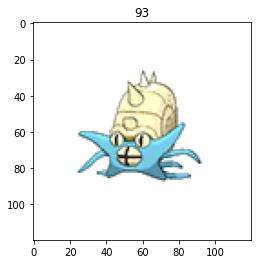

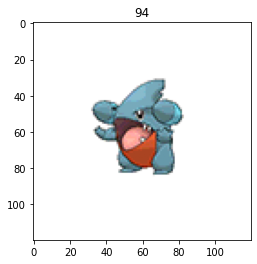

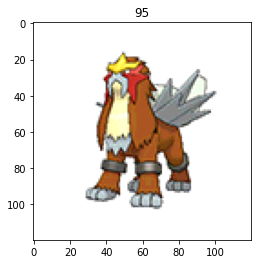

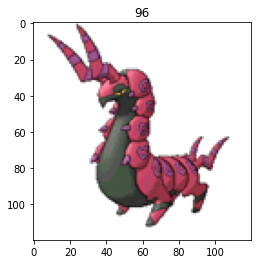

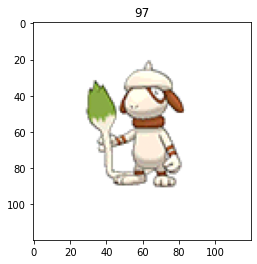

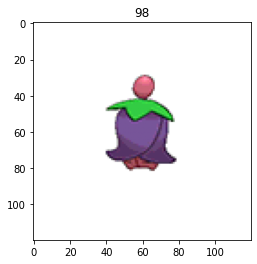

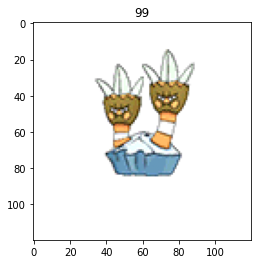

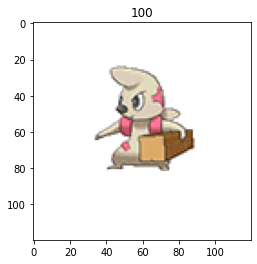

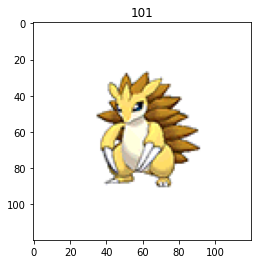

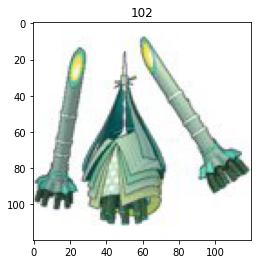

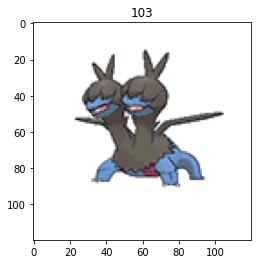

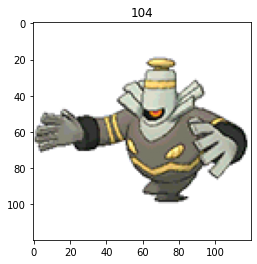

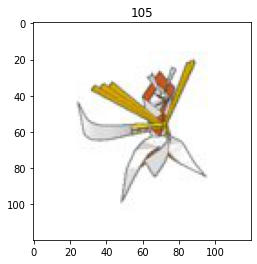

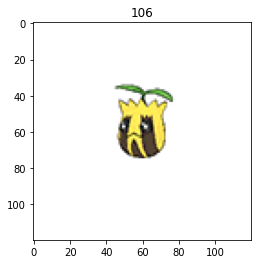

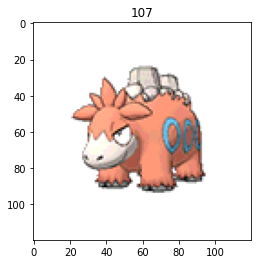

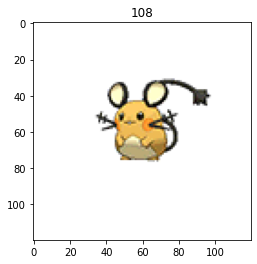

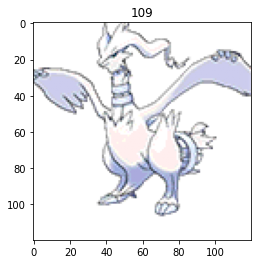

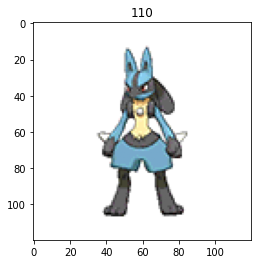

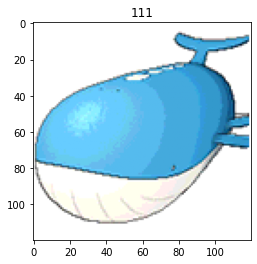

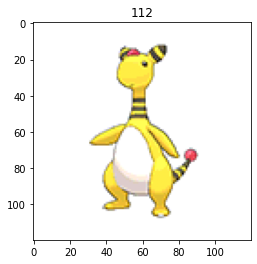

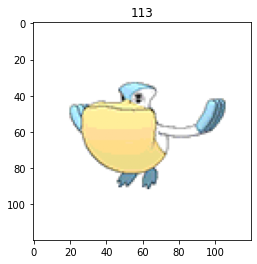

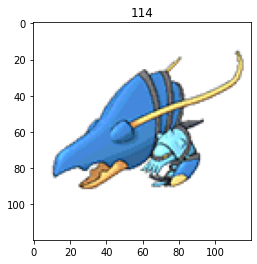

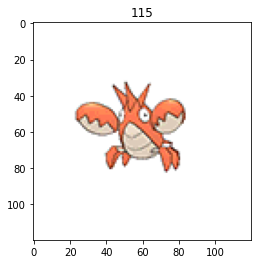

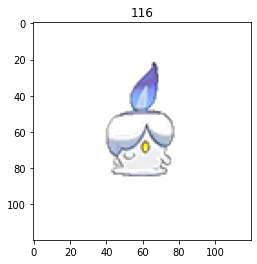

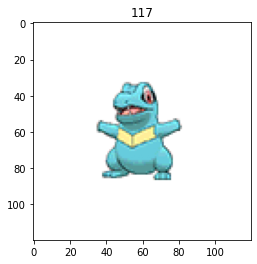

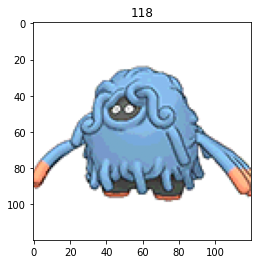

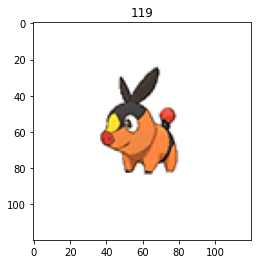

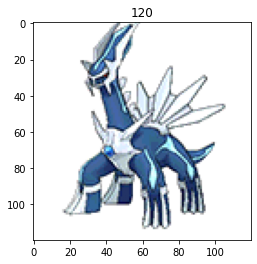

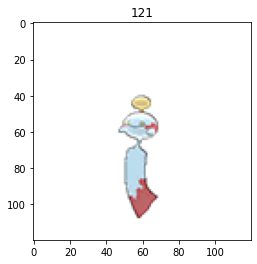

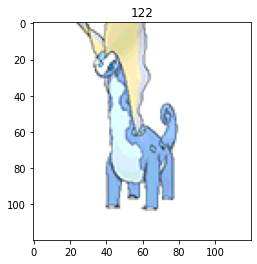

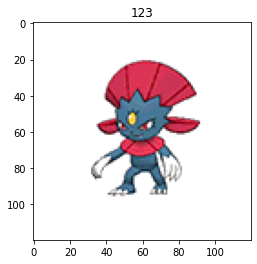

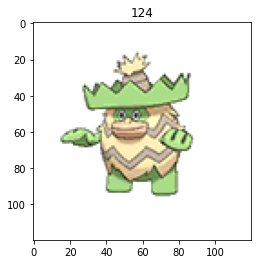

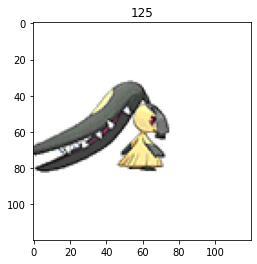

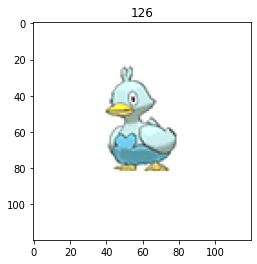

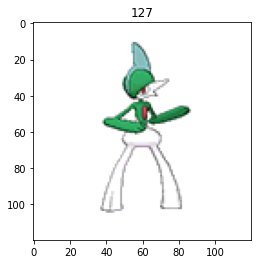

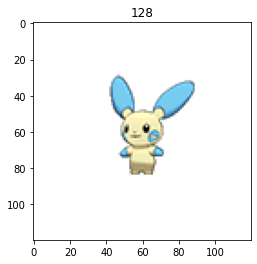

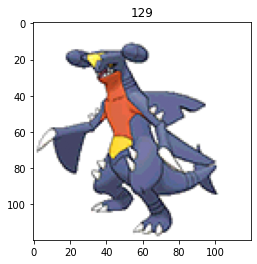

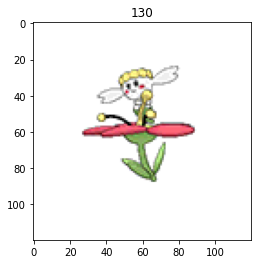

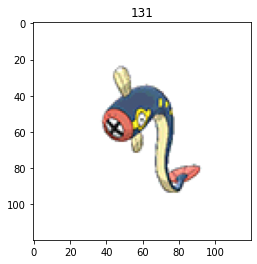

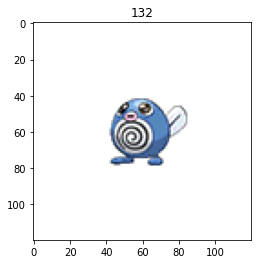

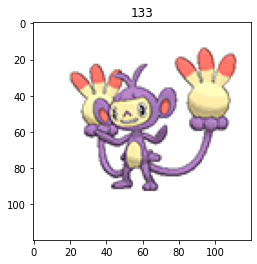

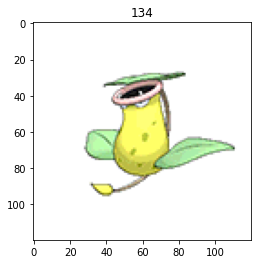

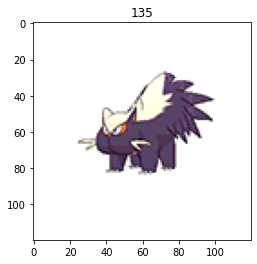

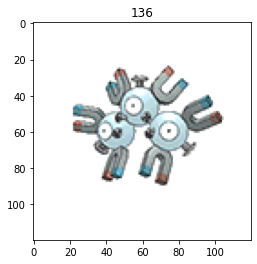

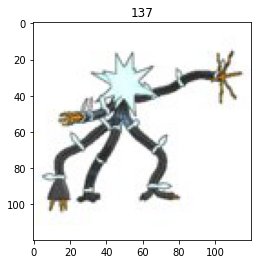

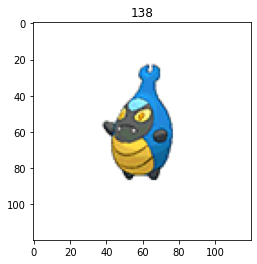

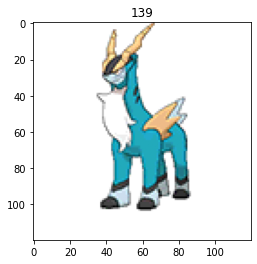

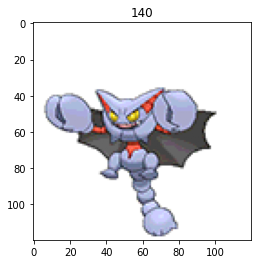

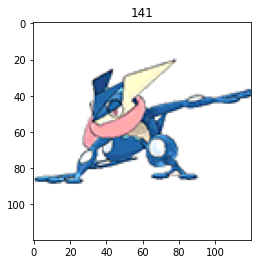

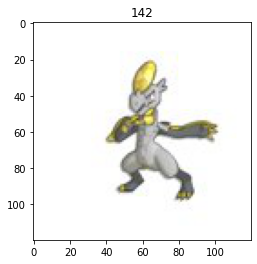

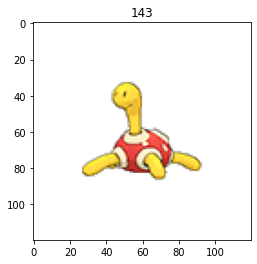

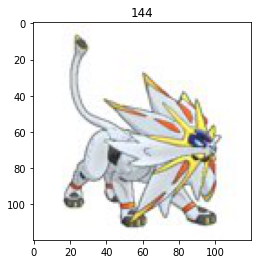

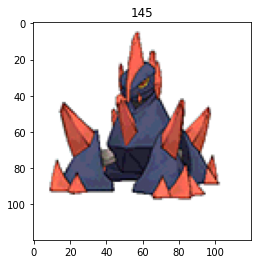

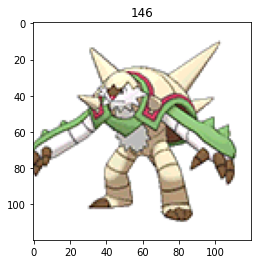

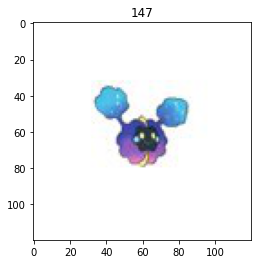

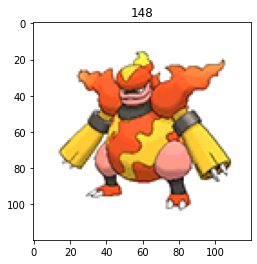

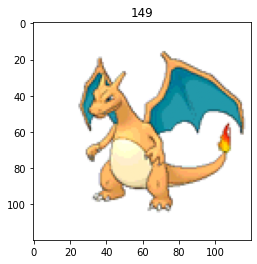

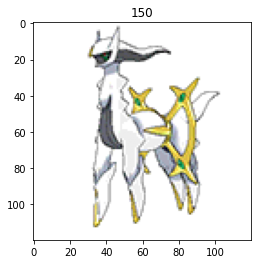

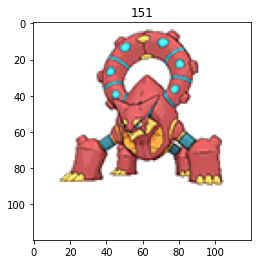

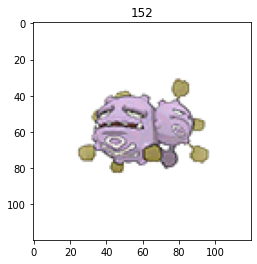

In [ ]:
for i in range(len(test_scaled)):
  plt.imshow(test_scaled[i].reshape(120,120,3))
  plt.title(i)
  plt.show()

In [ ]:
from google.colab import files
ul = files.upload()

Saving cyndaquil.png to cyndaquil (2).png


In [ ]:
import cv2
image = cv2.imread('cyndaquil.png')
print(image.shape)
print(image)

(120, 120, 3)
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [ ]:
for row_index in range(image.shape[0]):
  for col_index in range(image.shape[1]):
    if image[:, :, 2][row_index][col_index] == 0:    # png 데이터의 투명도를 나타내는 부분에서, 포켓몬 이미지를 제외한 배경의 pixel 값을 255로 바꿀 것임
      for i in range(3):
          image[:, :, i][row_index][col_index] = 255

image = image[:, :, :3] # 투명 부분 버리기

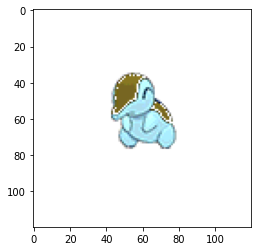

In [ ]:
plt.imshow(image)
plt.show()

[[0.05612481 0.05555658 0.0552088  0.05568859 0.0549462  0.05505665
  0.05627274 0.05389181 0.05518897 0.05689327 0.05549651 0.0552331
  0.05638888 0.05456038 0.0562151  0.05565298 0.05462826 0.05699637]]


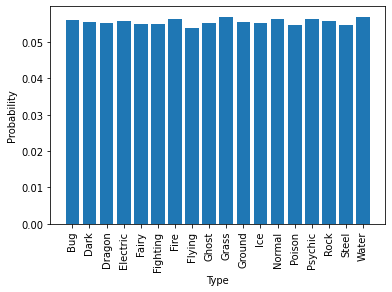

In [ ]:
preds = model.predict(image.reshape(1,120,120,3))
print(preds)

plt.bar(label, preds[0])
plt.xlabel('Type')
plt.ylabel('Probability')
plt.xticks(rotation=90)
plt.show()